In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

path = "/Users/matteo/Projects/MFI_matteo/MFI/"
os.chdir(path)

from pyMFI import MFI
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)


In [2]:
path_data = "/Users/matteo/Projects/MFI_matteo/MFI/Manuscript_Results/Figure1B/"

# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name=path_data + "HILLS40")

NH=10000

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name=path_data + "position40")
start=time.time()
# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 100, WellTempered=1, nhills=NH, periodic=1)
end=time.time()
print(end-start)

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

Total no. of Gaussians analysed: 10000


/Users/matteo/Projects/MFI_matteo/MFI/pyMFI/MFI.py:446: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/10000|==> Average Mean Force Error: 27.515740428974667
|200/10000|==> Average Mean Force Error: 27.177763275229434
|300/10000|==> Average Mean Force Error: 25.83602152651358
|400/10000|==> Average Mean Force Error: 25.549874930483274
|500/10000|==> Average Mean Force Error: 25.682374301499543
|600/10000|==> Average Mean Force Error: 26.193894905804427
|700/10000|==> Average Mean Force Error: 25.825294750567718
|800/10000|==> Average Mean Force Error: 26.567183252395974
|900/10000|==> Average Mean Force Error: 26.4995554952643
|1000/10000|==> Average Mean Force Error: 26.316108965035987
|1100/10000|==> Average Mean Force Error: 27.058244024397613
|1200/10000|==> Average Mean Force Error: 27.027662289314183
|1300/10000|==> Average Mean Force Error: 27.05326791573956
|1400/10000|==> Average Mean Force Error: 26.80296189075103
|1500/10000|==> Average Mean Force Error: 26.58212470157686
|1600/10000|==> Average Mean Force Error: 26.2064898908023
|1700/10000|==> Average Mean Force Error:

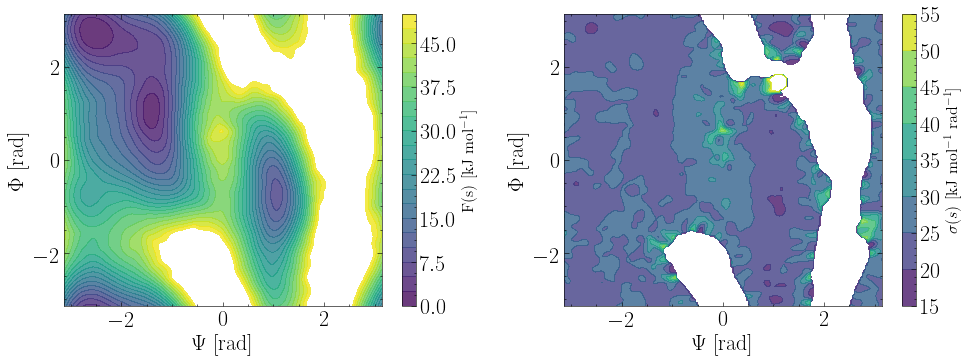

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure1B_1', dpi=600, bbox_inches='tight')

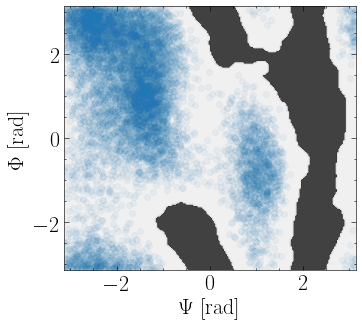

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_3', dpi=600, bbox_inches='tight')

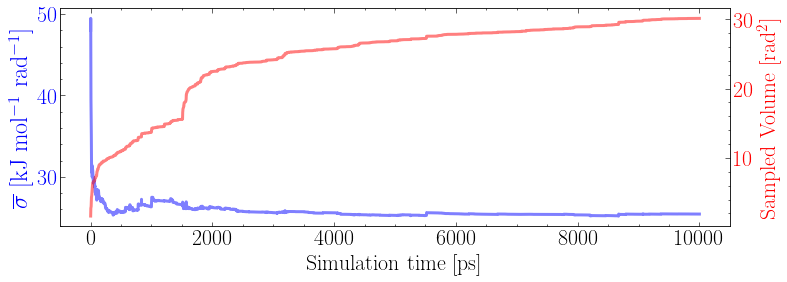

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in time_history[1:]], (ofe_history[1:NH]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$ rad$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation time [ps]')

V=np.multiply(volume_history[1:NH],np.power(2*np.pi/200,2))
ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume [rad$^2$]',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:NH],np.power(2*np.pi/200,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure1B_2', dpi=600, bbox_inches='tight')

Total no. of Gaussians analysed: 500
|10/500|==> Average Mean Force Error: 37.310125369967956
|20/500|==> Average Mean Force Error: 31.463386537217293
|30/500|==> Average Mean Force Error: 30.70311609244539
|40/500|==> Average Mean Force Error: 29.971428469301795
|50/500|==> Average Mean Force Error: 29.182095444381357
|60/500|==> Average Mean Force Error: 29.60764412220349
|70/500|==> Average Mean Force Error: 28.75069450431832
|80/500|==> Average Mean Force Error: 28.063364456971705
|90/500|==> Average Mean Force Error: 27.837047857899755
|100/500|==> Average Mean Force Error: 27.515740428974667
|110/500|==> Average Mean Force Error: 27.84308917219038
|120/500|==> Average Mean Force Error: 28.35637510529861
|130/500|==> Average Mean Force Error: 28.29592155524047
|140/500|==> Average Mean Force Error: 27.545935450549464
|150/500|==> Average Mean Force Error: 27.32625801318836
|160/500|==> Average Mean Force Error: 27.190557225882344
|170/500|==> Average Mean Force Error: 27.111698605

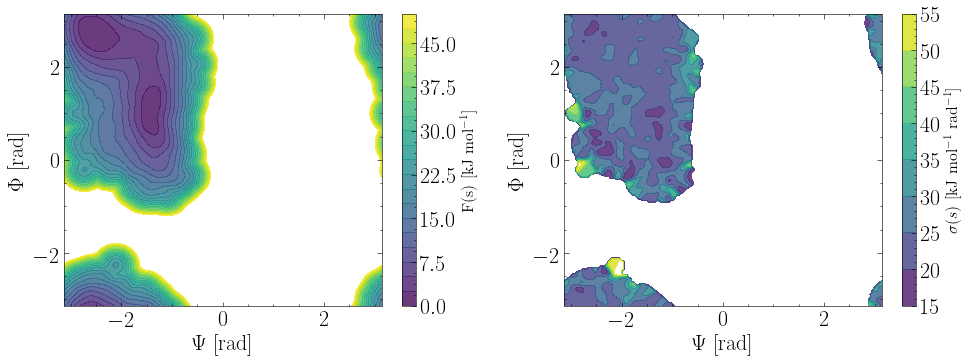

In [13]:
NH=500

# #Compute the time-independent mean force
results2 = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = NH, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results2

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()   



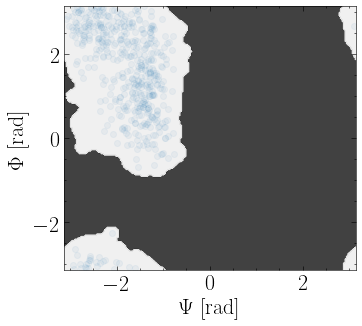

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_4', dpi=600, bbox_inches='tight')

Total no. of Gaussians analysed: 2000
|10/2000|==> Average Mean Force Error: 37.310125369967956


/Users/matteo/Projects/MFI_matteo/MFI/pyMFI/MFI.py:446: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|20/2000|==> Average Mean Force Error: 31.463386537217293
|30/2000|==> Average Mean Force Error: 30.70311609244539
|40/2000|==> Average Mean Force Error: 29.971428469301795
|50/2000|==> Average Mean Force Error: 29.182095444381357
|60/2000|==> Average Mean Force Error: 29.60764412220349
|70/2000|==> Average Mean Force Error: 28.75069450431832
|80/2000|==> Average Mean Force Error: 28.063364456971705
|90/2000|==> Average Mean Force Error: 27.837047857899755
|100/2000|==> Average Mean Force Error: 27.515740428974667
|110/2000|==> Average Mean Force Error: 27.84308917219038
|120/2000|==> Average Mean Force Error: 28.35637510529861
|130/2000|==> Average Mean Force Error: 28.29592155524047
|140/2000|==> Average Mean Force Error: 27.545935450549464
|150/2000|==> Average Mean Force Error: 27.32625801318836
|160/2000|==> Average Mean Force Error: 27.190557225882344
|170/2000|==> Average Mean Force Error: 27.11169860560007
|180/2000|==> Average Mean Force Error: 27.321286898510053
|190/2000|==>

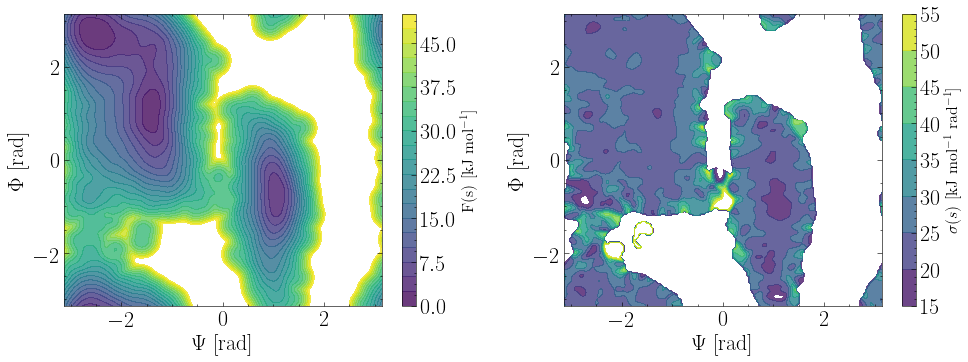

In [17]:
NH=2000

##Compute the time-independent mean force
results3 = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = NH, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results3

##integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()  

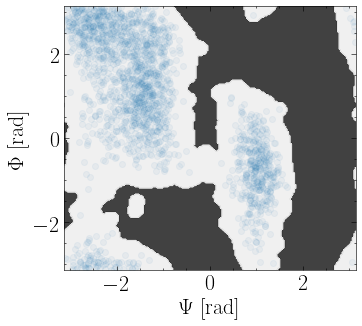

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_5', dpi=600, bbox_inches='tight')